<style>
    
    h1 {
      display: block;
      max-width: 100%;
      margin-left: auto;
      margin-right: auto;
      text-align: center;
      font-family: "Arial";
      font-size: 32px;
      line-height: 60px;
      font-style: normal;
    }
    
    h2 {
      font-family: "Arial", serif;
      font-size: 24px;
    }

    h3 {
      font-family: "Arial", serif;
      font-size: 20px;
    }

    h4 {
      text-align: center;
      font-size: 20px;
    }

    h5 {
      font-family: "Arial", serif;
      font-size: 16px;
      font-style: oblique;
    }

    div.text_cell_render {
      padding-left: 5%;
      padding-right: 5%;
      width: 90%;
      font-family: "Tahoma", serif;
      font-size: 14px;
    }
    
</style>


<!--
Potential variable values in report include: References as [[2]], Table/Figure numbers as Table 2, formulae with Latex format dollar-sign-enclosed, 
-->

<br>
<div align="center"><h1>Electronic nose response analysis:</h1></div>
<div align="center"><h4>Visualizing PCA and clustering of responses to<br>various edible substances</h4></div>

<br><br>
<h5>Faraz Hossein-Babaei</h5>
<br>

<h2>Introduction</h2>

<p>Olfactory is the only sense remaining to be successfully automated by and implemented in devices. This analysis is concerned with the responses of an electronic nose (e-nose) developed by the F. Hossein-Babaei group at K.N. Toosi University [[1]] to specimens of different brands of the edible substances, lemons juice, milk, and orange juice. Analysis performed on inorganic inedible samples as well using similar analyses prior to this study by the group [[1]]. The e-nose comprises distinct gas sensors in an array. The voltage across each TiO2-based semiconductor sensor element varies depending on the the molecules from the sample introduced, time, temperature, etc. owing to a change in reistivity of the element. The different elements respond differently temporally and characteristically to samples, and discriminating among their reponses potentially allows the fast identification of the samples to which the device is exposed. For this study normalized (ranging [0,1]) temporal profiles of responses to the edible substances were provided for anlaysis, 4 specimens from each of 4-7 brand samples for each of the 3 subtances. Different unsupervised methods were employed to cluster and distinguish among the brands of each substance. The results are presented in 3 dimensional space after Principle Component Analysis (PCA). For the analysis, each specimen profile was represented as a 300-dimensional/-feature observation based on 300 points along its temporal detection profile.

<br><br>

<h2>Method</h2>

<p>The data provided was read as a pandas.DataFrame objects with rows representing the observation or specimens and the columns the 300 detection values along each specimen's profile. The data provided was normalized ranging [0,1] and suitable for PCA and clustering analyses. Figure 1 shows the temporal profiles of the e-nose voltage responses. PCA was used to identify the principal components (PC) 3 of which were used for visual representation.

<p>Different clustering methods were utilized to separate       K-Means clustering was used from the scikit-learn package package's cluster module (module? sub-package? class?). The number of clusters was selected based on its optimization using the xxxxxxxxx analysis (?? factor? the one were centroid distance root-mean-sqr-sum drops sharply up to that point) and considering the actual number of known samples (?? it's not the case if we actually didn't do it. we wouldn't if we didn't have known samples!).

<p>In order to visually observe the variance in the 300-dimensional data, dimension reduction was employed. To reveal the distinction among different profiles belonging to the samples Principal Component Analysis (PCA) was used to visually observe each profile as a vector in 3D space. In the cases of all substance types the first 2 principal components (PCs) covered >96% (?? is this root-mean-squared too or just summed, either way, >95%) of that of the original 300 dimensional data. Figure xx shows the 3D, 2D, and 1D plots of the dimension reduced data of the "Lemon Juice" group. Plots in 3D and 2D based on the first 3 and 2 PCs, respectively are produced in Figures xx a-h. Azimuth and elevation angles were selected by trial and error for each 3D graph to reveal the segregation of the samples' profiles.

<p>Original [[1]](#References). To study as $\;4n_{g}+2n_{s}+n_{b}$, where $[n_g,\;n_s,\;n_b]$ represents [[2]](#References). $\;\;A\;/\;p^{m}\;$. Figures 9 and 10 for information [[4]](#References) presented in Figure 8.

<br><br>

<h2><b>Results</b></h2>

<h3><b>Clustering</b></h3>

<p>K-Means: k-profiles for milk correctly suggest 4 clusters, but favor 2 for lemon instead of 4 and possibly 3 or 6 for oranges, instead of the correct values of 4 and 7. Known values of {4, 4, 7} for {lemon juice, milk, orange} were used for the clustering analysis. As PCA analysis showed, milk is the only subtance whose profiles' second principal component was significant in variance beside the first. Table 2 shows

<p>Affinity Propagation: preference and damping: Over a wide range of parameters pref -0.01 ~ -2, the Milk substance samples were well clustered with 4 clusters correctly identified. Over a narrower range, all samples behaved well with the Affinity Propagation clustering. ALl damping values [0.5-1) were adequate for the clustering to the optimum level displayed.
The ideal result was produced at values are preference of -0.15 and damping for example 0.5 agreeable for all substances.

<p>DBSCAN:

<p>Mean-Shift:

<br>

<h3><b>PCA</b></h3>

<p>Figure xx a-c shows the 3-, 2-, and 1-dimensional profiles for the lemon juice substance type group based on the first three PCs. Even though the first PC covers 99% of the variance of the original data, the 2nd component reveals the distinction among two pairs of the samples (?? Is this correct?), of the samples within each of the natural and the commercial pairs of lemon juices. The 3-D plot further shows separation among the 4 samples relative to the 2-D diagram. Figure xx a-h shows the 3-D and 2-D reduced dimensional plots for all substance types of lemon juice, milk, and orange. All samples exhibit strong clustering among known samples with only one or two specimens deviating from their sample group, e.g. one from the Natural 1 milk sample falls inside the Taravat (?? like Brand D?) milk domain. Among oranges, the Saanich and Organic Saanich samples' clusters are very near each other with a small overlap. The Northern 2 and Northern 3 orange sample clusters have very similar profiles, too, but are still inter-distinguishable.

<br>

<br><br>

<h2><b>Conclusion</b></h2>

<p>[Some of the intro]

<p>How well the K-Means clusters match the known samples as viewed in the first 3 PC plots for the 3 edible substance types.

<br><br>

<h2>References</h2>

[[1]] [r1] Open database, "Summer Olympic medallists 1896 to 2008" from "Olympic medal winners: Every one since 1896 as open data", The Guardian, Publ. 2012-6-24, Collected 2016-8-20
[r1]: https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data
[[2]] [r2] Wikipedia, "All-time Olympic Games medal table", Publ. 2012-6-24, Collected 2016-8-20
[r2]: https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table
[[3]] [r3] World Development Indicators, Collected 2016-9-14
[r3]: http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators
[[4]] [r4] Wikipedia, "List of participating nations at The Summer Olympic Games", Collected 2016-10-1
[r4]: https://en.wikipedia.org/wiki/List_of_participating_nations_at_the_Summer_Olympic_Games
[[5]] [r5] Wikipedia, "Mixed teams at The Olympics", Collected 2016-9-1
[r5]: https://en.wikipedia.org/wiki/Mixed_teams_at_the_Olympics

<br>


In [1]:
""" Hide code segments from nbviewer output """
""" From http://protips.maxmasnick.com/hide-code-when-sharing-ipython-notebooks """
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
""" Electronic nose response analysis: Faraz Hossein-Babaei   2016-11-7 ~ ... """
""" Data reading segment """

# Module/Function loading:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import matplotlib.gridspec
#import ipy_table
import warnings
import IPython.display as dp

%matplotlib inline
plt.style.use('ggplot')   # style for plots
pd.set_option('display.float_format', lambda x: '%.4f' % x)   # formats floats to show up with 4 dec. digits when display() used


# Constants:
CLR_MAP = plt.cm.Set1   # Color map to use for all plots. Set1, Set3, Set2, Dark2, Accent
CLR_MAP_2 = plt.cm.Dark2    # COlor map for 3D plots of clustering models compared with experimental data
CLR_DENOM = 8.          # To divide by to assign individual colors to subplots
ELV_AZMT_DCT = {"Lemon juices":(10,80), "Milks":(70,70), "Orange juices":(80,10)}   # Elev,Azmt angs for 3D plots
SUBST_DICT = {0:"Lemon juices", 1:"Milks", 2:"Orange juices"}   # as arranged in the 1st cell of this notebook
SUBSTS = ["Lemon juices", "Milks", "Orange juices"]   # List of main substance groups; iterate through, not of dict, control order


def read_edible_file(file_nm, col_pre, col_idxs):
    """ Helps make file reading below brief in code. Assumes fixed param as specified in def """
    col_names = [col_pre + str(i) for i in range(len(col_idxs))]   # prefix + {0,1,2,...}
    return pd.read_csv(file_nm, header=None, skiprows=1, nrows=300, names=col_names, \
                       usecols=col_idxs, dtype=np.float64)

brands_origin_bool = False   # Just used for following for now to show/hide commercial names
if brands_origin_bool:
    # Original
    lmon_nms = ["Mahram","Natural 1","Yek o yek","Natural 2"]
    milk_nms = ["Natural 1","Taravat","Kaleh","Natural 2"]
    orng_nms = ["North 1","Sanich","Rani","Organic Sanich","North 2","South","North 3"]
else:
    # Alternate
    lmon_nms = ["LA","Natural 1","LB","Natural 2"]
    milk_nms = ["Natural 1","MA","MB","Natural 2"]
    orng_nms = ["North 1","OA","OB","Organic OA","North 2","South","North 3"]

# Read tables for each substance subject to experiment with e-nose
#lemon juices:
lmon1 = read_edible_file("res_data/lemons.csv", lmon_nms[0]+" ", [0,1,2,3])
lmon2 = read_edible_file("res_data/lemons.csv", lmon_nms[1]+" ", [4,5,6,7])
lmon3 = read_edible_file("res_data/lemons.csv", lmon_nms[2]+" ", [8,9,10,11])
lmon4 = read_edible_file("res_data/lemons.csv", lmon_nms[3]+" ", [12,13,14,15])
#milks:
milk1 = read_edible_file("res_data/milks.csv", milk_nms[0]+" ", list(range(10)))
milk2 = read_edible_file("res_data/milks.csv", milk_nms[1]+" ", list(range(10,20)))
milk3 = read_edible_file("res_data/milks.csv", milk_nms[2]+" ", list(range(20,30)))
milk4 = read_edible_file("res_data/milks.csv", milk_nms[3]+" ", list(range(30,40)))
#orange juices:
orng1 = read_edible_file("res_data/oranges.csv", orng_nms[0]+" ", [0,1,2,3])
orng2 = read_edible_file("res_data/oranges.csv", orng_nms[1]+" ", [4,5,6,7])
orng3 = read_edible_file("res_data/oranges.csv", orng_nms[2]+" ", [8,9,10,11])
orng4 = read_edible_file("res_data/oranges.csv", orng_nms[3]+" ", [12,13,14,15])
orng5 = read_edible_file("res_data/oranges.csv", orng_nms[4]+" ", [16,17,18,19])
orng6 = read_edible_file("res_data/oranges.csv", orng_nms[5]+" ", [20,21,22,23])
orng7 = read_edible_file("res_data/oranges.csv", orng_nms[6]+" ", [24,25,26,27])

#dp.display (milk2.iloc[200:220,:])
lemons = [lmon1, lmon2, lmon3, lmon4]
milks = [milk1, milk2, milk3, milk4]
orangs = [orng1, orng2, orng3, orng4, orng5, orng6, orng7]

df_lists_list = [lemons, milks, orangs]
names_list = [lmon_nms, milk_nms, orng_nms]


In [3]:
""" Plot function definition """

def plot_df_list (ax, df_list, df_names, ttl, x_lbl, y_lbl, clrmp, ln_styl, ln_wd, atten):
    
    font = {'font.family':'Arial', 'font.weight':'normal', 'font.size':22}
    plt.rcParams.update(font)

    clrs_dict = {}
    num_plots = len(df_list)
    cnt = 0
    for i,df in enumerate(df_list):   # Building dict of colors for all unique df columns
        cur_num = 1.0*cnt / CLR_DENOM   # num_plots
        if cur_num > 1: cur_num -= 1
        clrs_dict[i] = clrmp(cur_num)
        cnt += 1
    
    proxies = []
    for i,df in enumerate(df_list):
        # Using a proxy list for grouping legend colors for substance groups, not sequentially. Find on Stack overflow, quote url
        proxy, = plot_df (ax, df, ttl, x_lbl, y_lbl, clrs_dict[i], ln_styl, ln_wd, atten)
        proxies.append (proxy)
    
    ax.legend (proxies, df_names, ncol=1, loc='best', fontsize=16, columnspacing=1.5, \
               labelspacing=0.5, handletextpad=0.5, handlelength=1.5, fancybox=True, shadow=True)
    
    return ax


def plot_df (ax, df, ttl, x_lbl, y_lbl, clr, ln_styl, ln_wd, atten):
    """ Plot DataFrame for each column as a curve. """
    
    for col in df:
        this_plt = ax.plot( df[col], color=clr, linewidth=ln_wd, linestyle=ln_styl, alpha=atten)
    
    ax.set_title(ttl, fontsize=32)
    ax.set_xlabel(x_lbl)
    ax.set_ylabel(y_lbl)
    
    return this_plt


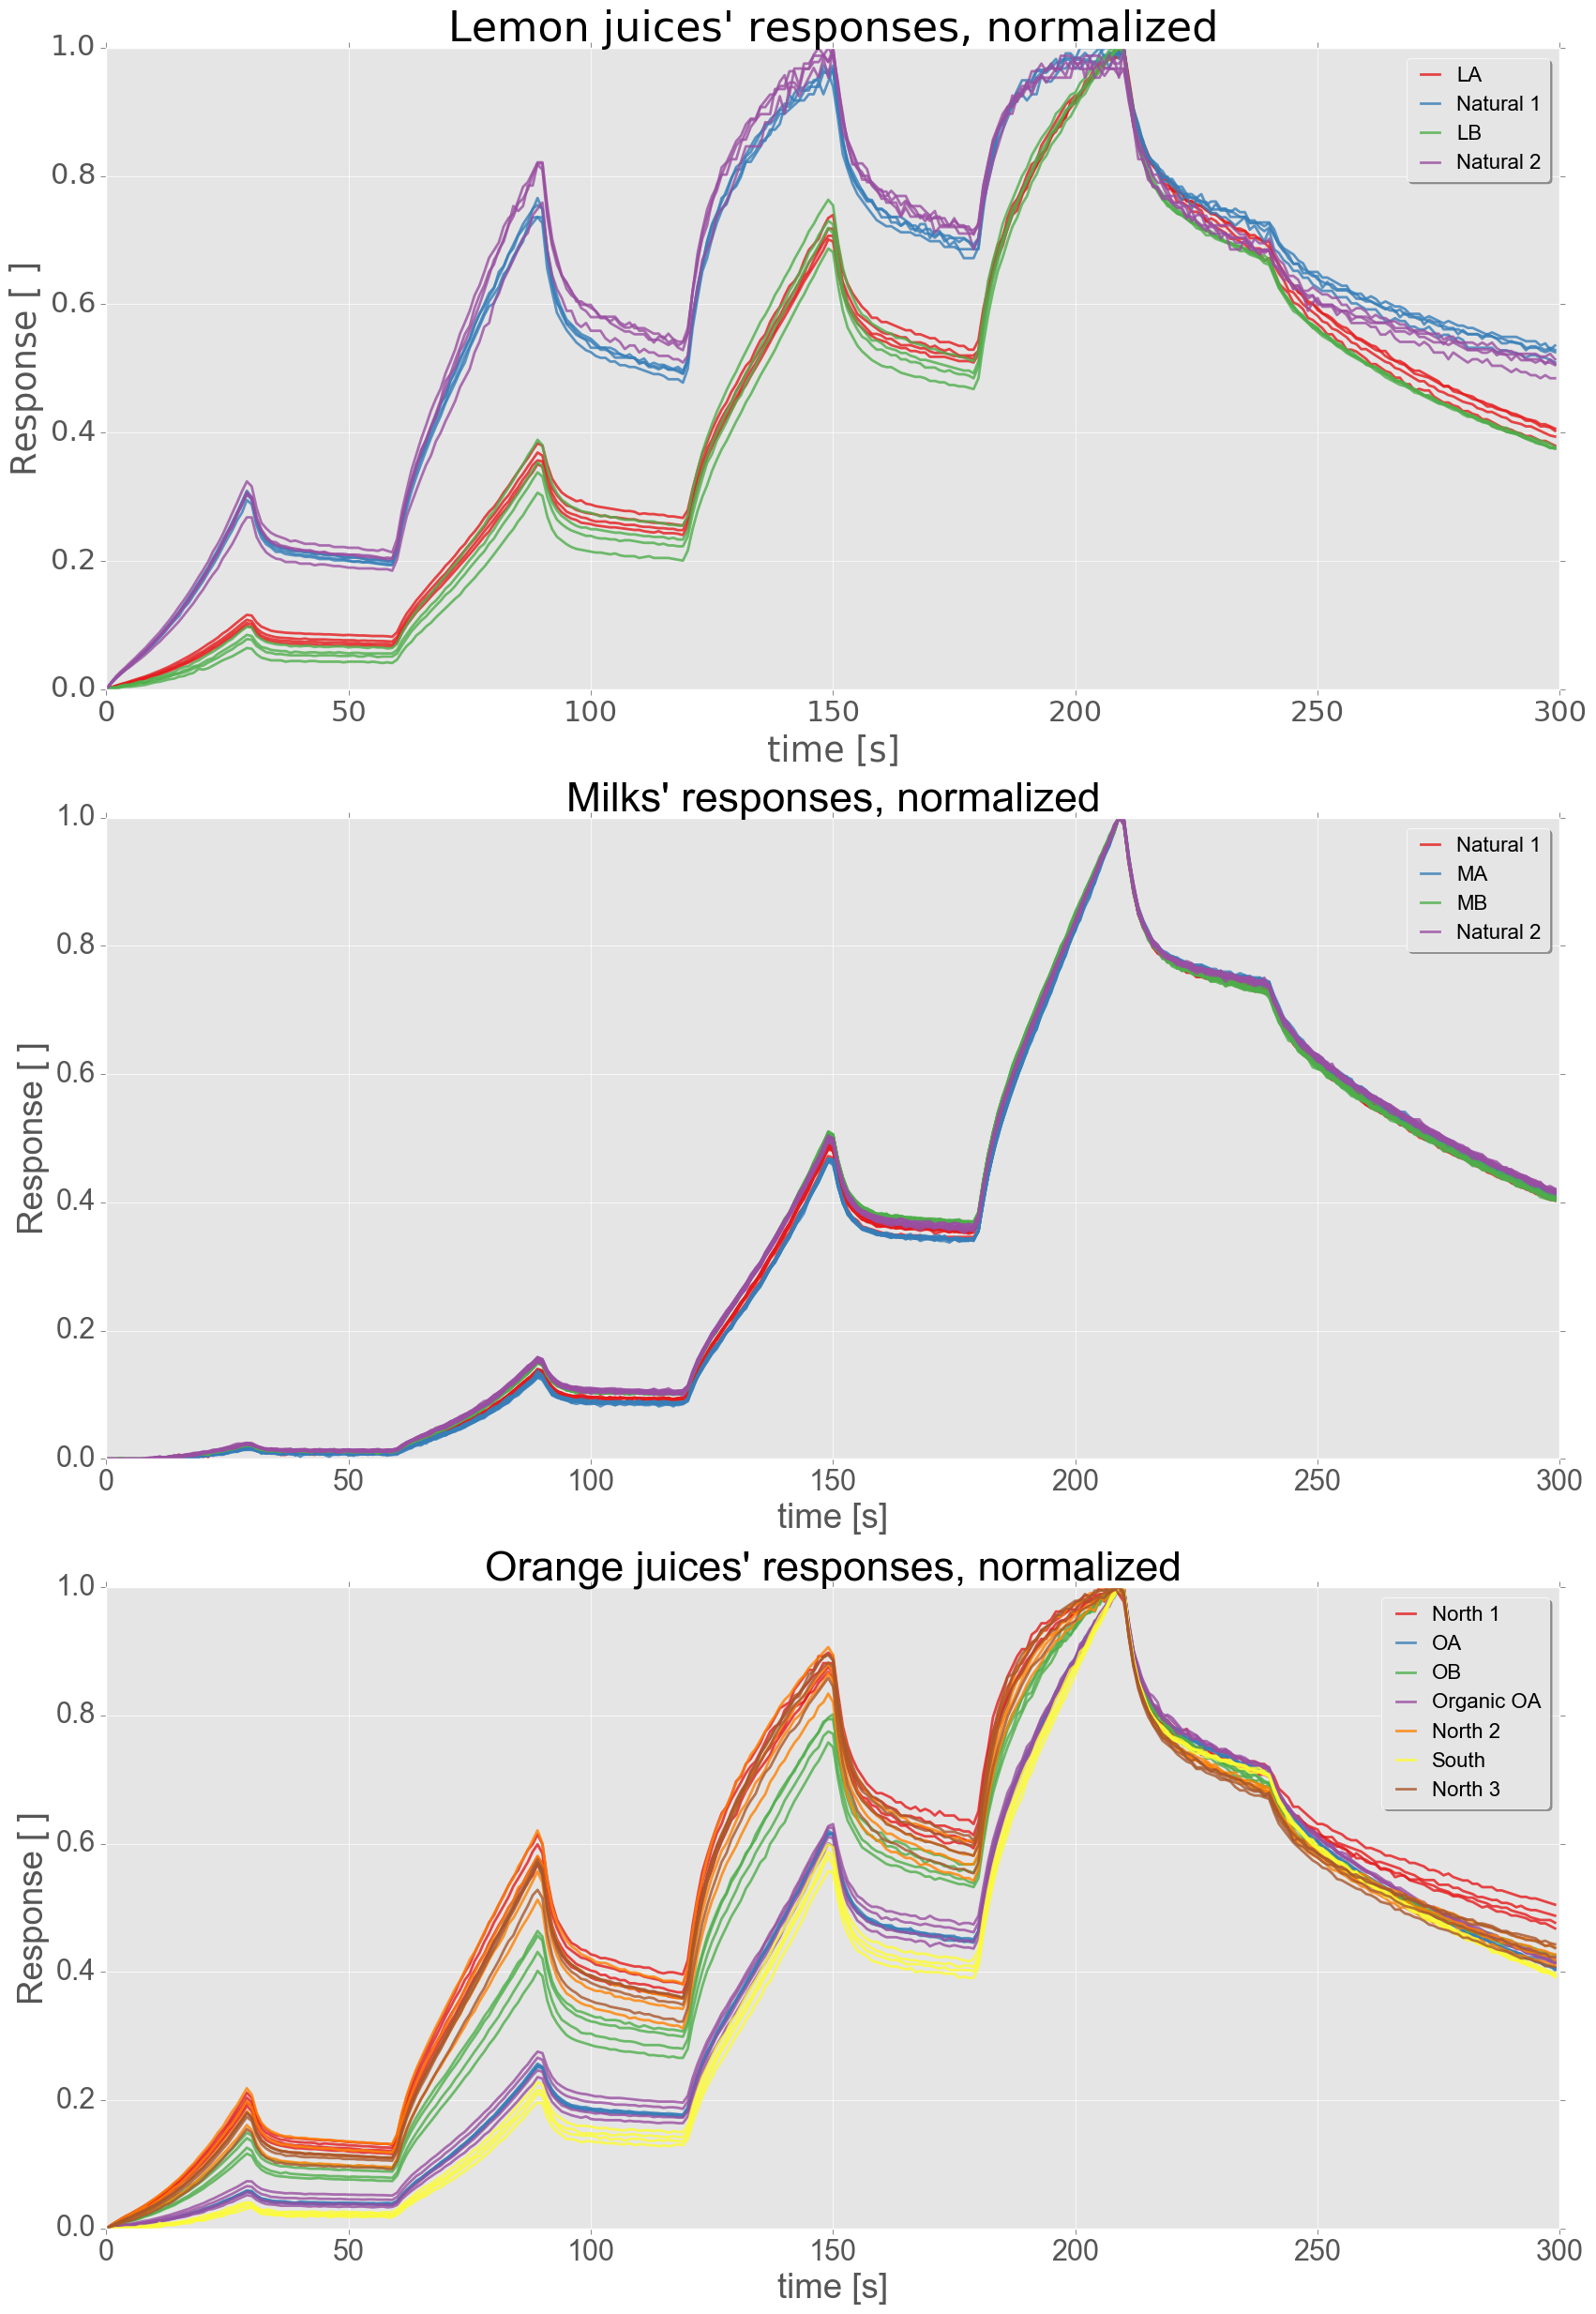

Figure 1: 



In [4]:
""" Plot to see relationship and how the data's already normalized. Maxs seem to match """

fig = plt.figure(figsize=(20,30))

for i,key in enumerate(SUBSTS):
    ax = fig.add_subplot(3,1,i+1)
    plot_df_list (ax, df_lists_list[i], names_list[i], "{0}' responses, normalized".format(key), "time [s]", "Response [ ]", \
             CLR_MAP, '-', 2.0, 0.8)
plt.show()
print ("Figure 1: \n")


In [5]:
""" Prepare dataframe groups for PCA and clustering keeping original association designation data """

collected_dfs = {}   # dict of keys from values of SUBST_DICT and to contain for each a df appending all respective sub-dfs

for i,df_list in enumerate(df_lists_list):   # iterating through substances
    for j, df in enumerate(df_list):         # iterating through sub-substances
        df = df.T
        df.loc[:,'ini grp'] = j   # To keep information about the experiment groups
        df.loc[:,'Main Group'] = SUBST_DICT[i]   # To ensure we don't lose track of substances
        if j == 0:
            collected_dfs[SUBST_DICT[i]] = df
        else:
            collected_dfs[SUBST_DICT[i]] = collected_dfs[SUBST_DICT[i]].append(df)
    df_tmp = collected_dfs[SUBST_DICT[i]]
    collected_dfs[SUBST_DICT[i]] = df_tmp.iloc[np.random.permutation(len(df_tmp))]
    # Don't shuffle/change hereafter. index should agree with its sibling's, being split-parted soon

#dp.display (collected_dfs["Milks"].iloc[:,0:300])   # Testing


In [6]:
""" PCA """

def do_pca_3 (df_key):
    """ Returns 3 first principal components of given dataframe after determining all PCs """
    
    red_df = collected_dfs[df_key].iloc[:,0:300]   # I thinks its a direct object ref, but not manipulating here
    
    pca = PCA(n_components=3)
    pca.fit(red_df)   # Unsuppressed, this output some PCA parameters. Check for insight for future application
    
    df_trans = pca.transform(red_df)
    red_3d_df = pd.DataFrame(df_trans, index=red_df.index)
    red_3d_df.columns = ['x','y','z']
    
    red_3d_df.loc[:,'Main Group'] = collected_dfs[df_key]["Main Group"]   # To ensure we don't lose track of substances
    red_3d_df.loc[:,'idx'] = [i[:-2] for i in collected_dfs[df_key].index]   # add col of subst type by list comprehension
    red_3d_df.loc[:,'Actual samples'] = collected_dfs[df_key]["ini grp"]   # To keep information about the experiment groups

    return (red_3d_df, pca.explained_variance_ratio_)


dfs_dict = {}
variance_coverages = pd.DataFrame(columns=['PC1','PC2','PC3'])
for key in SUBSTS:
    pca_res = do_pca_3(key)
    dfs_dict[key] = pca_res[0]   # a reduced 3D PCA df goes in as value of each key
    variance_coverages.loc[key,:] = pca_res[1]



print ("Table 1: ")
dp.display(dfs_dict["Milks"].head())   # Test
print ("\nTable 2: ")
dp.display(variance_coverages)


Table 1: 


,x,y,z,Main Group,idx,Actual samples
MA 9,0.1688,0.0565,0.0143,Milks,MA,1
MA 3,0.1786,-0.0117,-0.0057,Milks,MA,1
MB 5,-0.1182,-0.0535,-0.0065,Milks,MB,2
Natural 1 6,0.0217,-0.0440,-0.0056,Milks,Natural 1,0
MA 5,0.1824,0.0080,-0.0055,Milks,MA,1



Table 2: 


,PC1,PC2,PC3
Lemon juices,0.9891,0.0075,0.0014
Milks,0.7822,0.1788,0.0088
Orange juices,0.9843,0.0117,0.0025


In [7]:
""" Plot function """

# automate this. i.e. read the values to fill in this dictionary initially from a source base, and use them anywhere
cluster_methods = {"Actual samples":"Actual samples", "K-Means":"K-Means Clusters", "DBSCAN":"DBSCAN Clusters", \
                   "Affinity Propagation":"Affin. Prop. Clusters", "Mean Shift":"Mean Shift Clusters"}

def scatter_plot_smpl (num_dim, df, ttl, x_lbl, y_lbl, z_lbl, clrmp, mrk, mrksz, atten, elev, azim, cluster_method="Actual samples"):
    
    try:
        cluster_col = cluster_methods[cluster_method]
    except (KeyError): cluster_col = "Actual samples"

    ax=plt.gca()

    font = {'font.family':'Arial', 'font.weight':'bold', 'font.size':10}
    plt.rcParams.update(font)
    
    num_clrs = float(df.shape[0]/4)   # Well, use fixed CLR_DENOM instead
    ini_grps = df[cluster_col]
    ttl_ypos = 1.05   # position of the main title relative to plot. Param used to manually set in 3D case
    ax.tick_params(direction='out', pad=3)   # Aid stackoverflow: /questions/14800973/matplotlib-tick-labels-position-relative-to-axes
    
    if num_dim == 3:
        this_plt = ax.scatter ( xs=df['x'], ys=df['y'], zs=df['z'], c=clrmp(ini_grps/CLR_DENOM), \
                               edgecolor=clrmp(ini_grps/CLR_DENOM), marker=mrk, s=mrksz, alpha=atten)
        ax.view_init(elev=elev, azim=azim)   # elevation and angle
        #ax.dist=12                           # distance
        ax.set_zlabel(z_lbl, labelpad=12)
        ax.set_ylabel(y_lbl, labelpad=12)
        ax.set_xlabel(x_lbl, labelpad=12)
        cplnclr = (0.8, 0.8, 0.8, 1.0)
        ax.w_yaxis.set_pane_color(cplnclr)
        ttl_ypos = 1.15
    elif num_dim == 2:
        this_plt = ax.scatter ( x=df['x'], y=df['y'], color=clrmp(ini_grps/CLR_DENOM), \
                               edgecolor=clrmp(ini_grps/CLR_DENOM), marker=mrk, s=mrksz, alpha=atten)
        ax.set_ylabel(y_lbl)
        ax.set_xlabel(x_lbl)
    elif num_dim == 1:
        this_plt = ax.scatter ( x=df['x'], y=np.linspace(0,0,lemons_3d_df.shape[0]), color=clrmp(ini_grps/CLR_DENOM), \
                               edgecolor=clrmp(ini_grps/CLR_DENOM), marker=mrk, s=mrksz, alpha=atten )
        ax.set_xlabel(x_lbl)
        ax.set_yticks([0.])
    else:
        pass   # TODO: Raise exception

    ax.set_title(ttl, fontsize=16, y=ttl_ypos)
    
    legend_entries = []
    # Derive unique known groups and their labels to construct legend
    df_grpby = df.groupby([cluster_col], axis=0, as_index=False)   # as_index odd param. I use to keep groupby column
    #else:
    #    df_grpby = df.groupby(['ini grp'], axis=0)
    grps_df = df_grpby.first()
    for idx, row in grps_df.iterrows():
        if cluster_col == "Actual samples": lbl=row['idx']
        else: lbl = row[cluster_col]
        legend_entries.append(mpatches.Patch(color=clrmp(idx/CLR_DENOM), label=lbl))
    
    ax.legend ( handles=legend_entries, ncol=1, loc='best', fontsize=8, columnspacing=1.5, \
               labelspacing=0.5, handletextpad=0.5, handlelength=1.5, fancybox=True, shadow=True)
    
    return ax


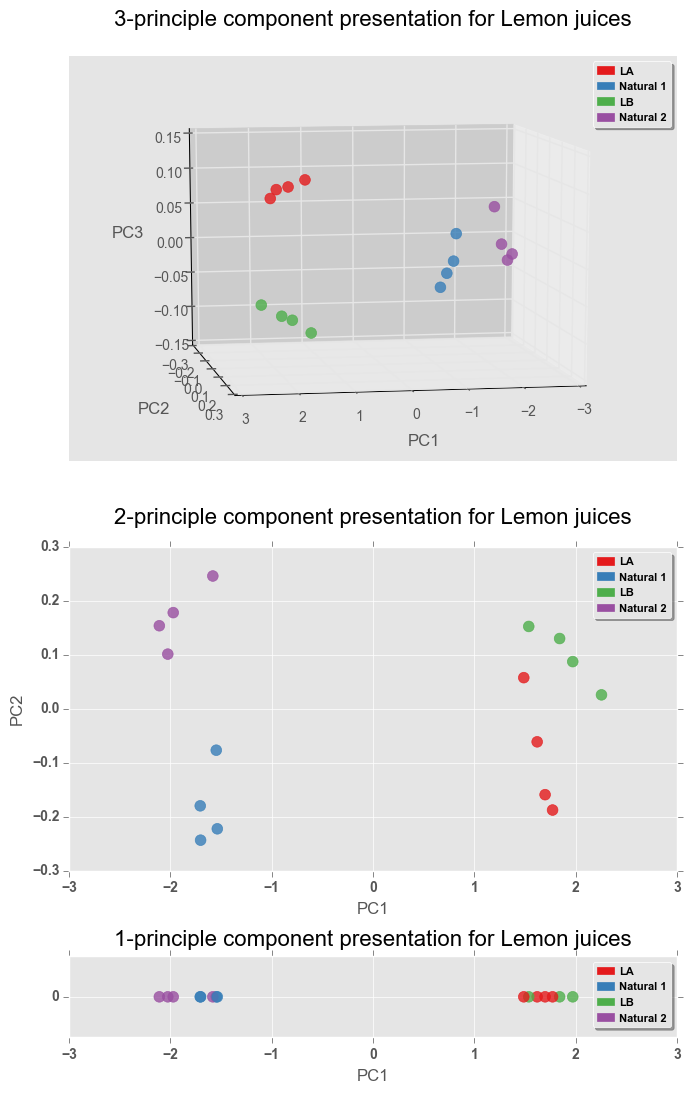

Figure 2: 



In [8]:
""" 3D, 2D, 1D Plots: Lemon juices example """

subst_name = "Lemon juices"
lemons_3d_df = do_pca_3(subst_name)[0]

gs = matplotlib.gridspec.GridSpec(3,1,height_ratios=[1,0.8,0.2])
fig = plt.figure(figsize=(7,11))
# 3D
plt.subplot(gs[0], projection='3d')
scatter_plot_smpl(3, lemons_3d_df, "3-principle component presentation for {0}".format(subst_name), \
           "PC1", "PC2", "PC3", CLR_MAP, 'o', 60, 0.8, 10, 80 )
# 2D
plt.subplot(gs[1])
scatter_plot_smpl(2, lemons_3d_df, "2-principle component presentation for {0}".format(subst_name), \
           "PC1", "PC2", "", CLR_MAP, 'o', 60, 0.8, 0, 0 )
# 1D
plt.subplot(gs[2])
scatter_plot_smpl(1, lemons_3d_df, "1-principle component presentation for {0}".format(subst_name), \
           "PC1", "", "", CLR_MAP, 'o', 60, 0.8, 0, 0 )

plt.tight_layout()
plt.show()
print ("Figure 2: \n")


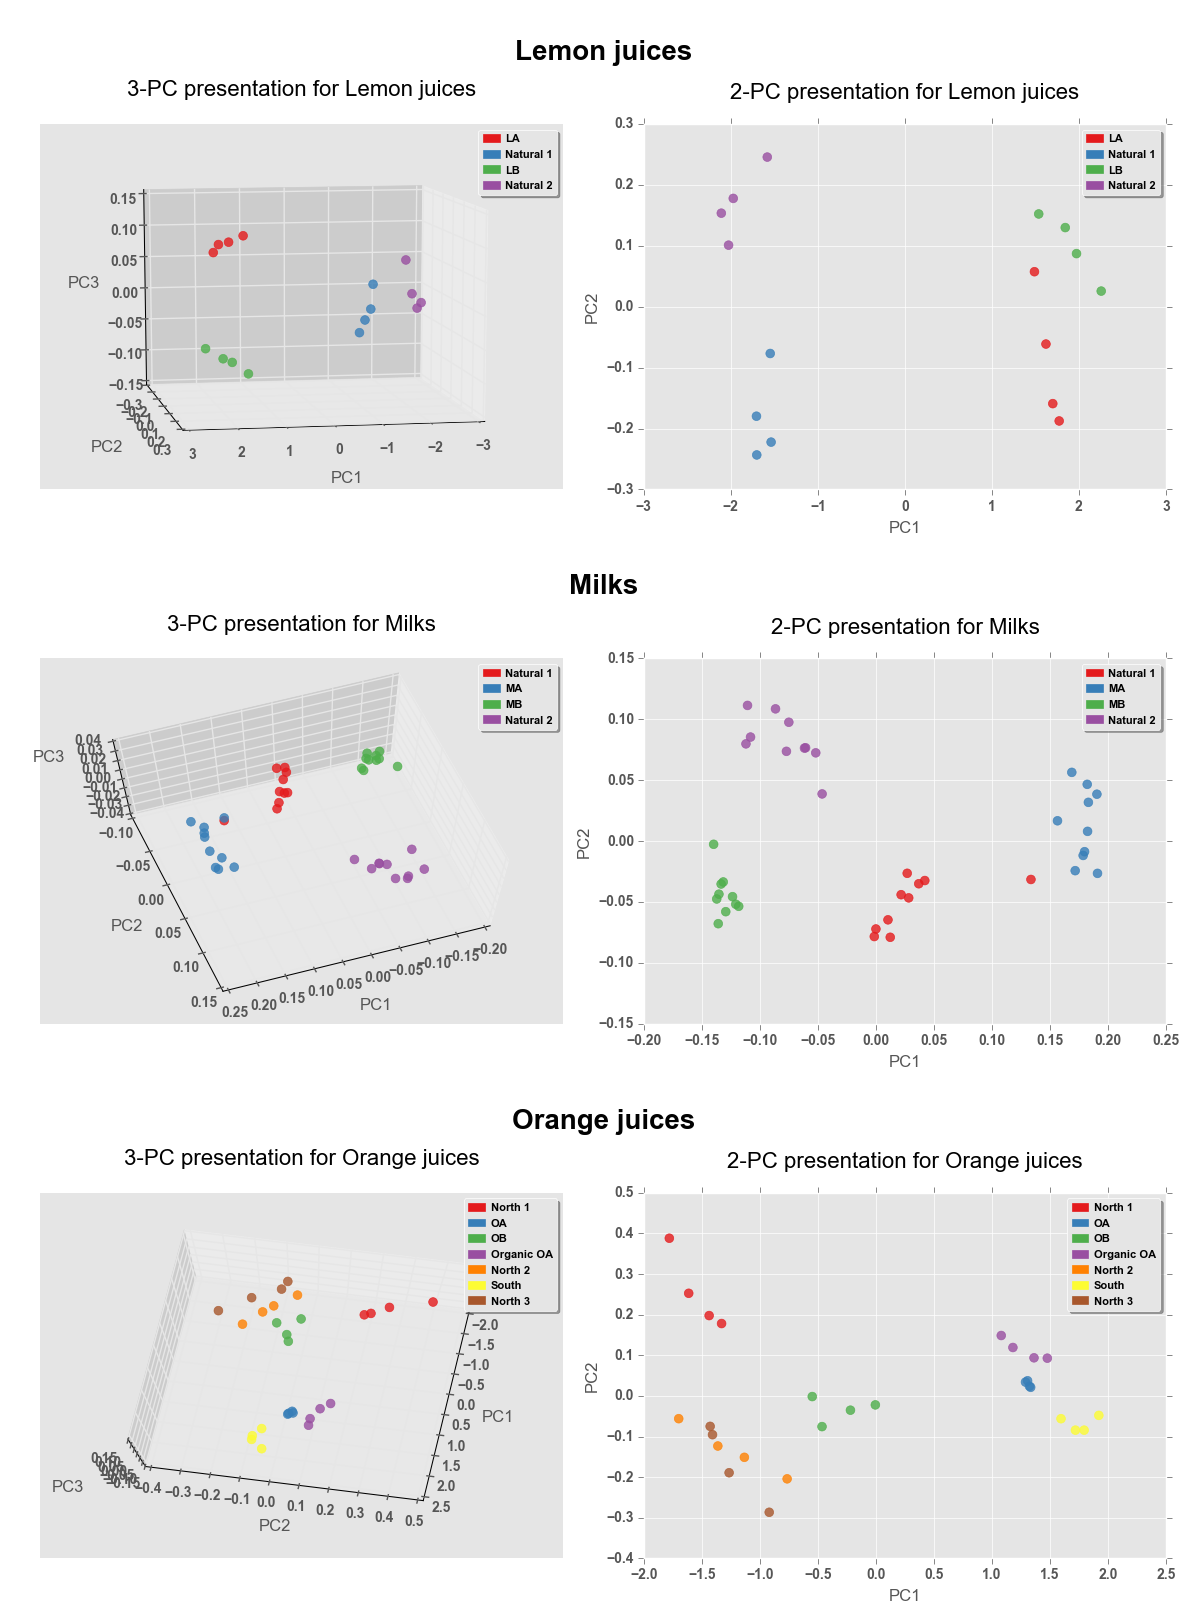

Figure 3: 



In [9]:
""" Plot all 3-D and 2-D from PCA """

# Now, plot
gs = matplotlib.gridspec.GridSpec(6, 2, width_ratios=[1,1], height_ratios=[0.01,1,0.01,1,0.01,1])
fig = plt.figure(figsize=(12,16))

for i,key in enumerate(SUBSTS):   # SUBSTS elems match collected_dfs's keys. Iterate list to avoid random order iteration

    plt.subplot(gs[2*i,:])
    plt.gca().axis('off')
    plt.text(s="\n"+key, va='center', ha='center', x=0.5, y=1.02, fontsize=20)   # given ha, x redundant but syntax needs it
    
    plt.subplot(gs[2*i+1,0], projection='3d')
    scatter_plot_smpl(3, dfs_dict[key], "3-PC presentation for {0}".format(key), \
               "PC1", "PC2", "PC3", CLR_MAP, 'o', 40, 0.8, ELV_AZMT_DCT[key][0], ELV_AZMT_DCT[key][1] )

    plt.subplot(gs[2*i+1,1])
    scatter_plot_smpl(2, dfs_dict[key], "2-PC presentation for {0}".format(key), \
               "PC1", "PC2", "", CLR_MAP, 'o', 40, 0.8, 0, 0 )

plt.tight_layout()
plt.show()
print ("Figure 3: \n")


Table 3: 


,Lemon juices,Milks,Orange juices
1,51.6770,0.7431,49.9431
2,1.3744,0.2805,5.8722
3,0.9123,0.1514,2.3213
4,0.5543,0.0575,1.6597
5,0.3834,0.0481,1.1071
6,0.2554,0.0412,0.7687
7,0.1663,0.0361,0.6089
8,0.1346,0.0332,0.5061
9,0.1004,0.0303,0.4097
10,0.0807,0.0287,0.2964


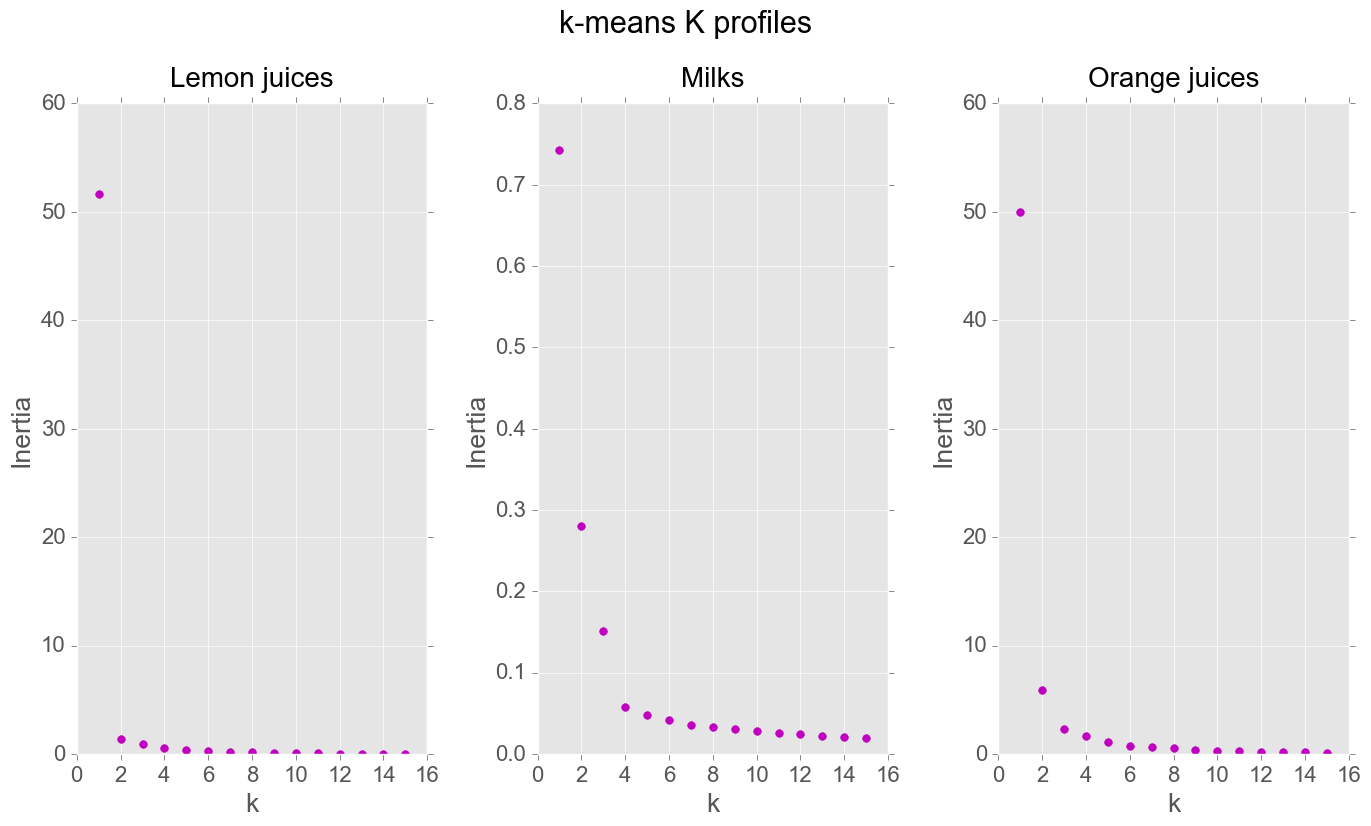

Figure 4: 



In [10]:
""" K-Means Clustering: Finding K """

xvals = list(range(1,16))
k_inertiae_um_df = pd.DataFrame(index=xvals)   # No need for data param as e.g. np.zeros(len(xvals))

# Iterate through our dataframes and candidate ks; put in k_factors_df the inertia (within-cluster sum of distance squares)
for key in SUBSTS:
    for n_clust in xvals:
        kmeans = KMeans(n_clusters = n_clust, max_iter=1000)
        clusters = kmeans.fit(collected_dfs[key].iloc[:,0:300])
        k_inertiae_um_df.loc[n_clust, key] = clusters.inertia_

print ("Table 3: ")
dp.display (k_inertiae_um_df)
print ()

font = {'font.family':'Arial', 'font.weight':'normal', 'font.size':16}
plt.rcParams.update(font)
fig = plt.figure(figsize=(14,8))
for i,key in enumerate(SUBSTS):
    ax = fig.add_subplot(1,3,i+1)
    #ax.set_yscale('log')
    ax.scatter ( x=xvals, y=k_inertiae_um_df[key], color='m', linestyle='-', marker='o', s=30 )
    ax.set_title (key+"\n", fontsize=20, linespacing=0.2)
    ax.set_ylabel("Inertia")
    ax.set_xlabel("k")
    ax.set_ylim(bottom=0.)

fig.text (s="k-means K profiles\n", x=0.5, y=0.95, ha='center', fontsize=22, linespacing=1.9)
plt.tight_layout()
plt.show()
print ("Figure 4: \n")


In [11]:
""" Clustering: """

km_params = {"Lemon juices":4, "Milks":4, "Orange juices":7}   # NUmbers of clusters, K, for the substance types
ap_params = {"Lemon juices":(-0.15,0.55), "Milks":(-0.15,0.55), "Orange juices":(-0.15,0.55)}
ms_params = {"Lemon juices":0.3, "Milks":0.1, "Orange juices":0.3}
db_params = {"Lemon juices":(0.09,2), "Milks":(0.09,2), "Orange juices":(0.09,2)}

for key in SUBSTS:
    pd.options.mode.chained_assignment = None     # suppressing the warning.

    # K-means
    kmeans = KMeans ( n_clusters=km_params[key], max_iter=1000 )
    km_clusters = kmeans.fit(collected_dfs[key].iloc[:,0:300])
    collected_dfs[key].loc[:,'auto k-means clusters'] = km_clusters.labels_   # raises a false Warning

    # Affinity Propagation
    affinp = AffinityPropagation ( preference=ap_params[key][0], damping=ap_params[key][1] )
    af_clusters = affinp.fit(collected_dfs[key].iloc[:,0:300])
    collected_dfs[key].loc[:,'auto affin prop clusters'] = af_clusters.labels_   # raises a false Warning

    # Mean shift
    #ms_bandwidth = estimate_bandwidth ( collected_dfs[key].iloc[:,0:300], quantile=0.2, n_samples=20 )
    mshift = MeanShift ( cluster_all=True, n_jobs=-1, bandwidth=ms_params[key] )
    ms_clusters = mshift.fit(collected_dfs[key].iloc[:,0:300])
    collected_dfs[key].loc[:,'auto mean shift clusters'] = ms_clusters.labels_   # raises a false Warning

    # DBSCAN
    dbscan = DBSCAN ( eps=db_params[key][0], min_samples=db_params[key][1], n_jobs=-1 )
    db_clusters = dbscan.fit(collected_dfs[key].iloc[:,0:300])
    collected_dfs[key].loc[:,'auto dbscan clusters'] = db_clusters.labels_   # raises a false Warning

    pd.options.mode.chained_assignment = 'warn'   # reenabling the warning

print ("Table 4: \n")
dp.display ( collected_dfs["Lemon juices"].head() )


# Append the clustering data to the PCAed dfs
for df_key, pca_df in dfs_dict.items():
    pca_df.loc[:,'K-Means Clusters'] = collected_dfs[df_key]["auto k-means clusters"]
    pca_df.loc[:,'DBSCAN Clusters'] = collected_dfs[df_key]["auto dbscan clusters"]
    pca_df.loc[:,'Affin. Prop. Clusters'] = collected_dfs[df_key]["auto affin prop clusters"]
    pca_df.loc[:,'Mean Shift Clusters'] = collected_dfs[df_key]["auto mean shift clusters"]
    # The variance coverage of each of the principal components [x,y,z]



Table 4: 



,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,ini grp,Main Group,auto k-means clusters,auto affin prop clusters,auto mean shift clusters,auto dbscan clusters
Natural 2 1,0.0000,0.0099,0.0187,0.0260,0.0324,0.0393,0.0457,0.0526,0.0596,0.0671,...,0.5186,0.5186,0.5229,0.5144,3,Lemon juices,3,3,3,-1
Natural 1 0,0.0000,0.0097,0.0176,0.0245,0.0315,0.0380,0.0439,0.0509,0.0573,0.0648,...,0.5169,0.5169,0.5132,0.5095,1,Lemon juices,1,1,1,-1
LA 2,0.0000,0.0027,0.0046,0.0068,0.0085,0.0108,0.0126,0.0149,0.0170,0.0191,...,0.4097,0.4097,0.4080,0.4028,0,Lemon juices,2,0,0,-1
Natural 2 3,0.0000,0.0107,0.0201,0.0277,0.0347,0.0422,0.0491,0.0569,0.0640,0.0725,...,0.5143,0.5069,0.5143,0.5069,3,Lemon juices,3,3,3,-1
LA 1,0.0000,0.0027,0.0052,0.0072,0.0096,0.0114,0.0136,0.0160,0.0180,0.0205,...,0.4026,0.3991,0.3956,0.3938,0,Lemon juices,2,0,0,-1


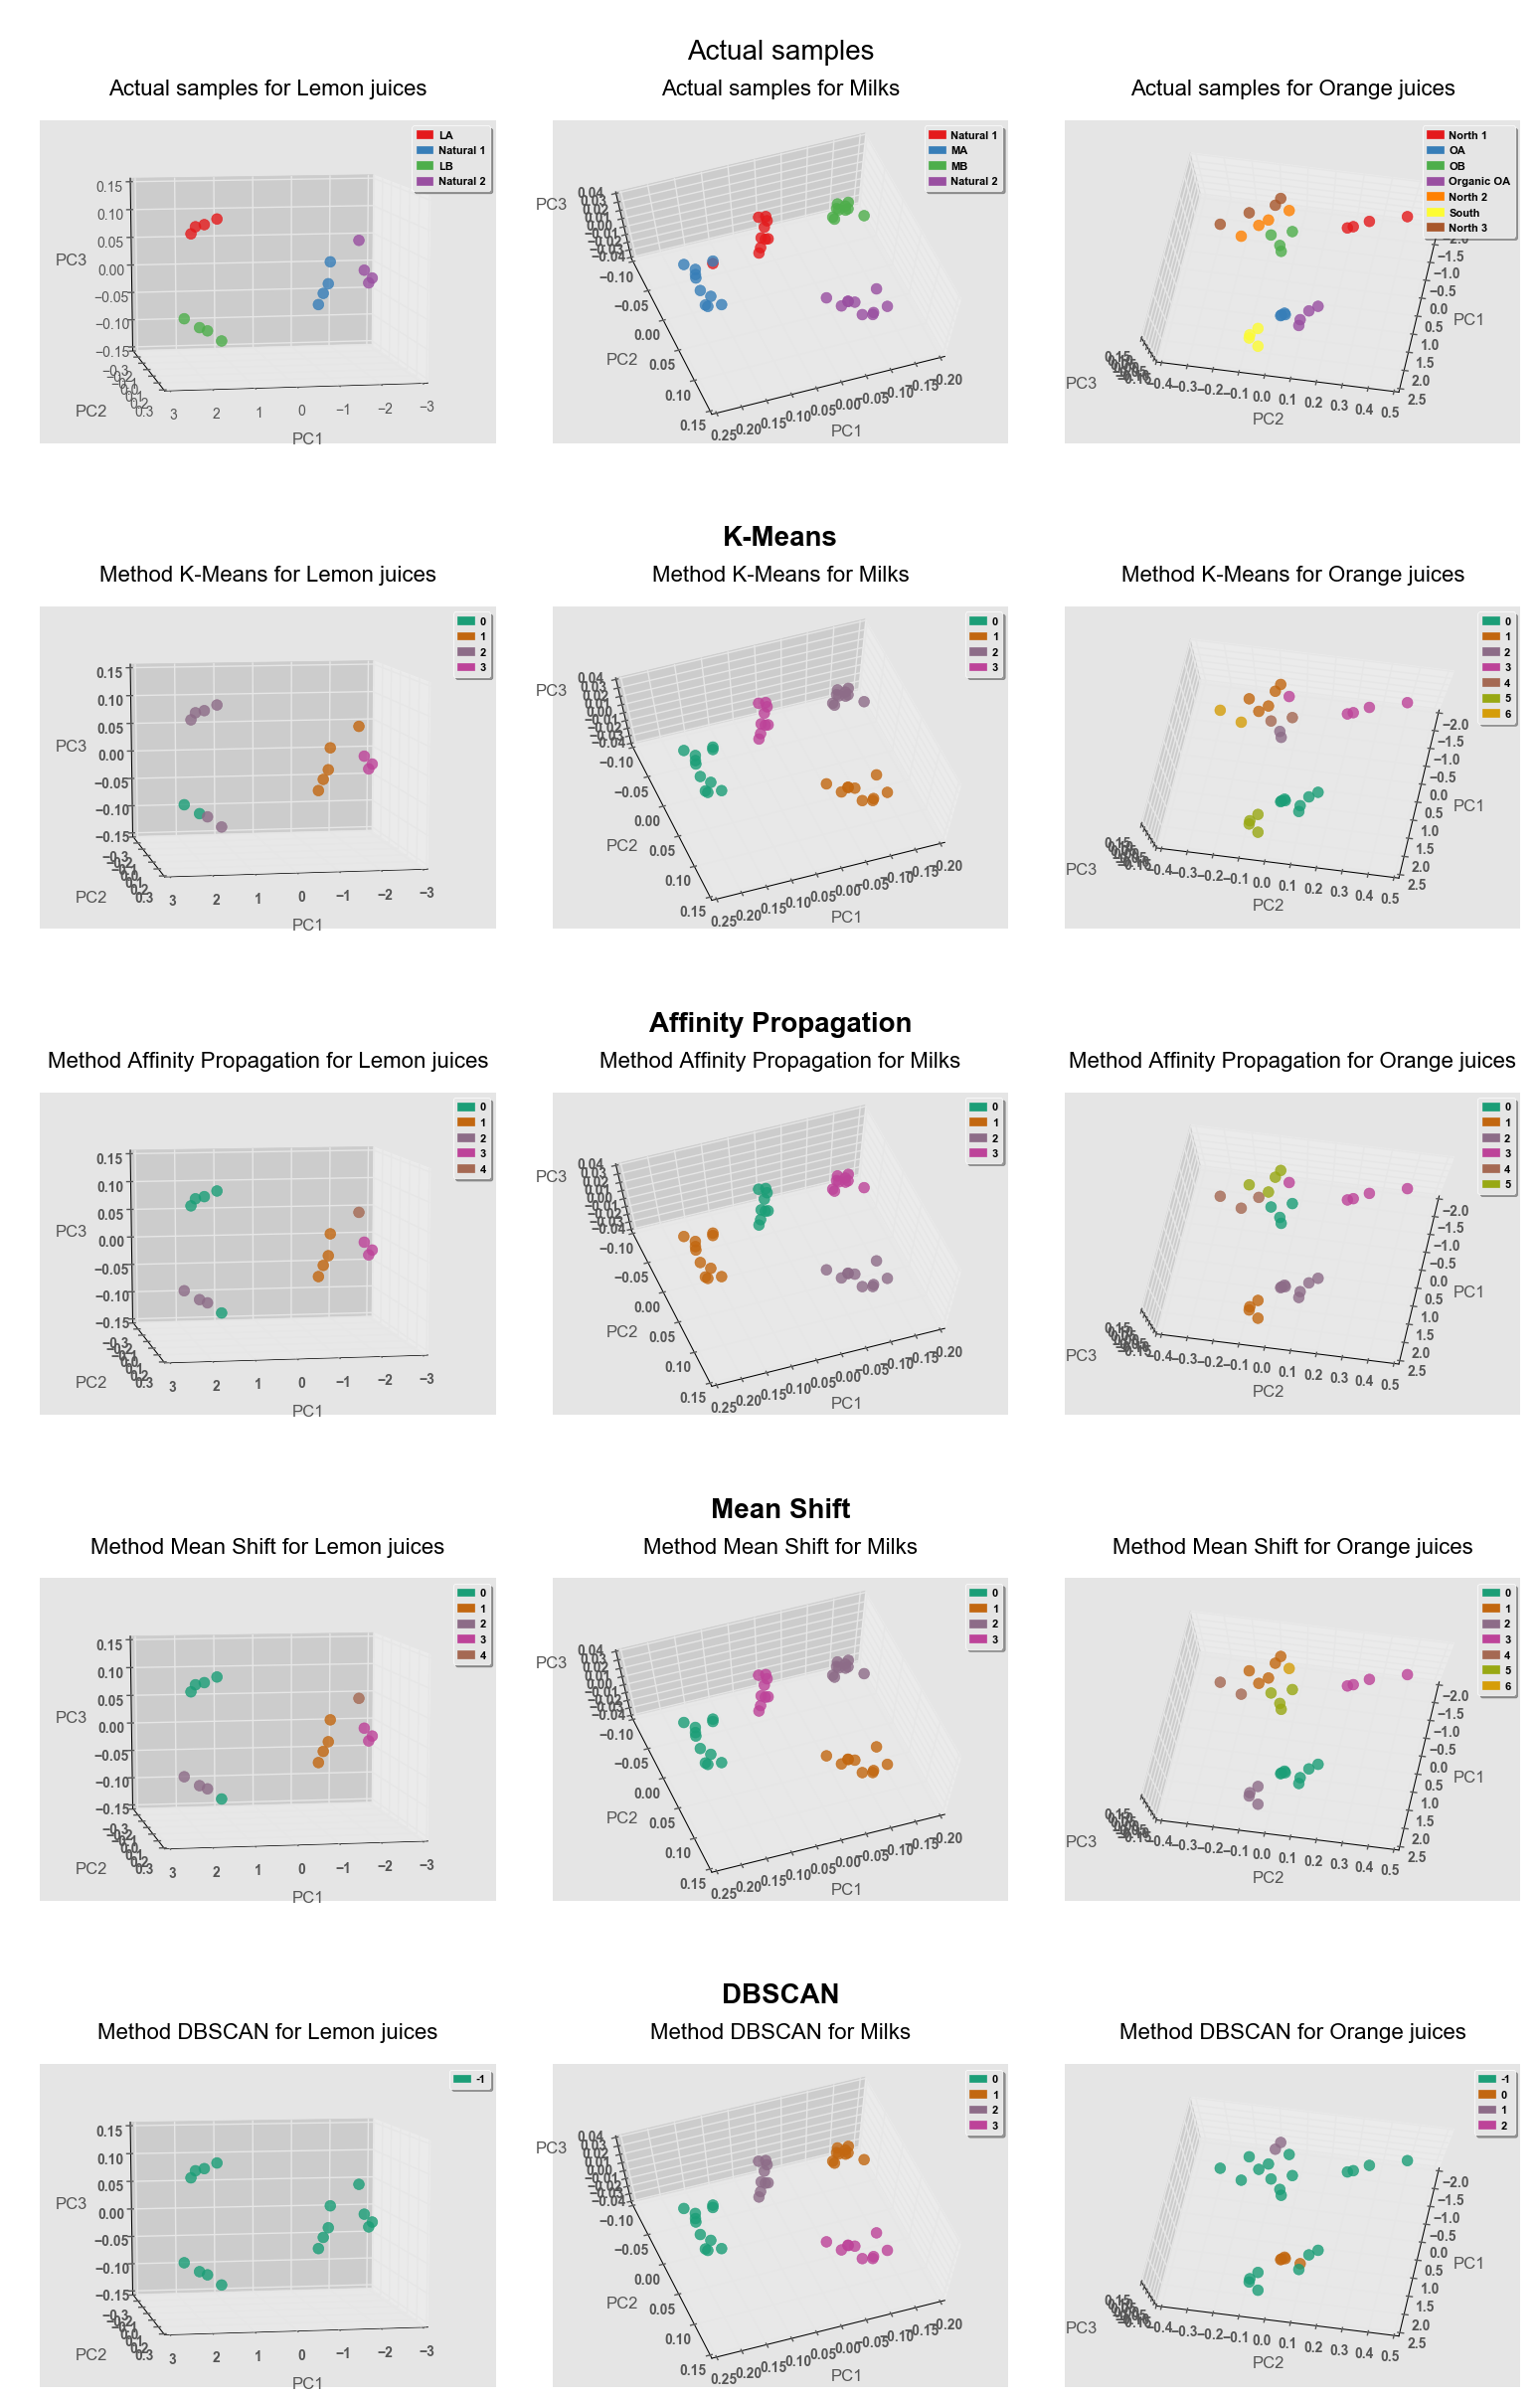

Figure 5: 



In [12]:
""" Plotting with original groupings and assigned clusters """


gs = matplotlib.gridspec.GridSpec(10, 3, width_ratios=[1,1,1], height_ratios=[0.01,1,0.01,1,0.01,1,0.01,1,0.01,1])
fig = plt.figure(figsize=(16,24))

for mtd_idx, method in enumerate(["Actual samples", "K-Means", "Affinity Propagation", "Mean Shift", "DBSCAN"]):

    plt.subplot(gs[2*mtd_idx,:])
    plt.gca().axis('off')
    plt.text(s="\n"+method, va='center', ha='center', x=0.5, y=1.02, fontsize=20)   # given ha, x redundant but syntax needs it

    clrmp = CLR_MAP_2 if method!="Actual samples" else CLR_MAP
    
    for i,key in enumerate(SUBSTS):   # SUBSTS elems match collected_dfs's keys. Iterate list to avoid random order iteration

        sec_ttl = "{0} for {1}".format("Method "+method if method!="Actual samples" else method, key)
        
        plt.subplot(gs[2*mtd_idx+1,i], projection='3d')
        scatter_plot_smpl( 3, dfs_dict[key], sec_ttl, "PC1", "PC2", "PC3", clrmp,
                          'o', 60, 0.8, ELV_AZMT_DCT[key][0], ELV_AZMT_DCT[key][1], \
                          cluster_method=method )

plt.tight_layout()
plt.show()
print ("Figure 5: \n")


In [13]:
#""" Test ground: Method(parameters) Optimization ground: Now serving Affinity Propagation by trial and error """
#method = "DBSCAN"
#for pref,damp in zip([-0.1,-0.1,-0.12,-0.12,-0.13,-0.13,-0.14,-0.14,-0.15,-0.15,-0.16,-0.16,-0.18,-0.18],\
#                     7*[0.55,0.8]):   # for Affinity propagation
#for a,bw in zip([1,2,3,4,5,6,7,8],[0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.3]):   # for mean-shift
# for eps,minn in zip([0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09],5*[1,1.5,2]):   # for DBSCAN
#     for key in SUBSTS:
#         dbscan = DBSCAN ( eps=eps, min_samples=minn, p=p, n_jobs=-1 )
#         db_clusters = dbscan.fit(collected_dfs[key].iloc[:,0:300])
#         pd.options.mode.chained_assignment = None     # suppressing the warning.
#         collected_dfs[key].loc[:,'auto dbscan clusters'] = db_clusters.labels_   # raises a false Warning
#         pd.options.mode.chained_assignment = 'warn'   # reenabling the warning
#     dfs_dict = {}
#     for key in SUBSTS:
#         dfs_dict[key] = do_pca_3(key)[0]   # a reduced 3D PCA df goes in as value of each key
#     gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[1])
#     fig = plt.figure(figsize=(12,4))
#     for i,key in enumerate(SUBSTS):   # SUBSTS elems match collected_dfs's keys. Iterate list to avoid random order iteration
#         plt.subplot(gs[0,i], projection='3d')
#         scatter_plot_smpl( 3, dfs_dict[key], "DBSCAN {0}".format(key), \
#                           "PC1", "PC2", "", CLR_MAP_2, 'o', 60, 0.8, ELV_AZMT_DCT[key][0], \
#                           ELV_AZMT_DCT[key][1], cluster_method=method)
#     plt.tight_layout()
#     plt.show()
#     print ("p:{0}, eps:{1}, min_num_pts{2}: {3}\n".format(p, eps, minn, method))
